In [1]:
import datetime
import numpy as np
from matplotlib import pyplot as plt, dates
import seaborn as sns 
import pandas as pd
import pickle

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV

In [3]:
data = pd.read_csv('albedo_df_updated.csv')
data = data.drop('AL2', axis=1)

In [4]:
y = np.array(data['albedo'])
X = data.drop('albedo', axis = 1)
X_list = list(X.columns)
X = np.array(X)

In [5]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.25, random_state = 42)

In [14]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [16]:
y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R^2 : % f" %(r2))

R^2 :  0.418255


In [19]:
# hyperparameter tuning
n_estimators = [200, 300, 500, 1000]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 100, num = 5)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [ ]:
rf_random.best_params_

In [ ]:
y_pred = rf_random.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R^2 : % f" %(r2))

In [19]:
filename = 'albedo_df/rf_model.sav'
pickle.dump(rf_random, open(filename, 'wb'))

In [17]:
rf_best = RandomForestRegressor(n_estimators = 200, 
                                min_samples_split = 5,
                                min_samples_leaf = 2,
                                max_features = 'sqrt',
                                max_depth = 52,
                                bootstrap = False,
                                random_state = 42)
rf_best.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=52, max_features='sqrt',
                      min_samples_leaf=2, min_samples_split=5, n_estimators=200,
                      random_state=42)

In [18]:
y_pred = rf_best.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R^2 : % f" %(r2))

R^2 :  0.431019


In [6]:
model = pickle.load(open('albedo_df/rf_model.sav', 'rb'))

In [12]:
model.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 52,
 'bootstrap': False}

In [7]:
model.best_estimator_.feature_importances_

array([0.0639739 , 0.08083126, 0.03084739, 0.0725948 , 0.05942489,
       0.03504978, 0.06487857, 0.0652887 , 0.09714127, 0.06135993,
       0.05803871, 0.06924152, 0.08299584, 0.07795139, 0.08038203])

<Figure size 720x720 with 0 Axes>

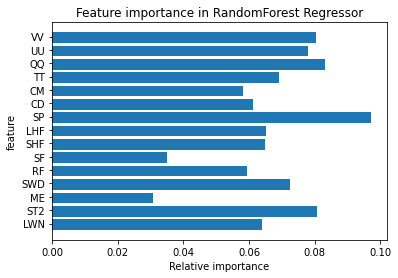

<Figure size 720x720 with 0 Axes>

In [13]:
importance = model.best_estimator_.feature_importances_

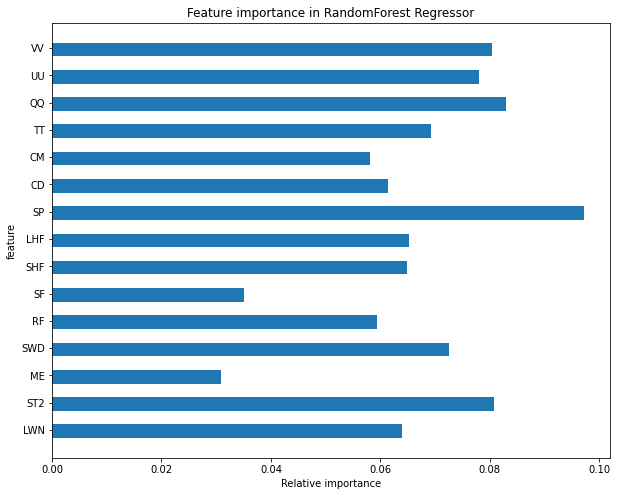

<Figure size 576x576 with 0 Axes>

In [20]:
fig, ax = plt.subplots() 
width = 0.5 # the width of the bars
ind = np.arange(len(importance)) # the x locations for the groups
ax.barh(ind, importance, width)
ax.set_yticks(ind+width/10)
ax.set_yticklabels(X_list, minor=False)
plt.title('Feature importance in RandomForest Regressor')
plt.xlabel('Relative importance')
plt.ylabel('feature') 
plt.figure(figsize=(8,8))
fig.set_size_inches(10, 8, forward=True)